<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/main/8_MedImp_Segmentation_lungs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Segmenation**

Image segmentation is the division of an image into several segments (many pixels). Image segmentation is commonly used to highlight objects and edges in images. More precisely, image segmentation is the process of assigning labels to each pixel in an image such that pixels with the same labels share common visual characteristics.

Segmentation is used in many areas, for example, in manufacturing to indicate defects in the assembly of parts, in medicine to search for tumors and other pathologies.

Let's consider a segmentation algorithm based on Felsenszwalb graphs from the skimage library. The algorithm segments a multi-channel (e.g., RGB) image using fast clustering based on a minimum spanning tree on the image grid. The `scale` parameter specifies the observation level. The higher the `scale`, the fewer and larger the segments. `sigma` is the diameter of the Gaussian kernel used to smooth the image before segmentation.

The number of segments produced, as well as their size, can only be controlled indirectly through `scale`. The size of a segment in an image can vary greatly depending on contrast. For RGB images, the algorithm uses the Euclidean distance between pixels in color space.

Our task will be to try to segment both lungs in the X-ray image we are already familiar with.

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [3]:
mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c siim-acr-pneumothorax-segmentation

100% 412M/412M [00:00<00:00, 437MB/s]
100% 412M/412M [00:00<00:00, 524MB/s]


In [5]:
!unzip siim-acr-pneumothorax-segmentation.zip

Archive:  siim-acr-pneumothorax-segmentation.zip
  inflating: download_images.py      
  inflating: mask_functions.py       
  inflating: stage_2_images/ID_0011fe81e.dcm  
  inflating: stage_2_images/ID_003206608.dcm  
  inflating: stage_2_images/ID_004d6fbb6.dcm  
  inflating: stage_2_images/ID_004d72c54.dcm  
  inflating: stage_2_images/ID_00528aa0e.dcm  
  inflating: stage_2_images/ID_00593ac6d.dcm  
  inflating: stage_2_images/ID_00b0e5a9f.dcm  
  inflating: stage_2_images/ID_00b115bfe.dcm  
  inflating: stage_2_images/ID_00d054471.dcm  
  inflating: stage_2_images/ID_00f04769e.dcm  
  inflating: stage_2_images/ID_00f715288.dcm  
  inflating: stage_2_images/ID_010566ba9.dcm  
  inflating: stage_2_images/ID_0159b1d59.dcm  
  inflating: stage_2_images/ID_017bd788a.dcm  
  inflating: stage_2_images/ID_018f96b48.dcm  
  inflating: stage_2_images/ID_0194bdd5a.dcm  
  inflating: stage_2_images/ID_01a3312da.dcm  
  inflating: stage_2_images/ID_01bbf9032.dcm  
  inflating: stage_2_images/I

In [6]:
!pip install pydicom

import pydicom

from matplotlib import cm
from matplotlib import pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.2 MB/s eta 0:00:00


In [7]:
example = 'stage_2_images/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(example)


import numpy as np
from skimage.exposure import equalize_hist
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.segmentation import felzenszwalb
from skimage.transform import rescale

In [8]:
# Zero values > 65

im_thres = imagedata.pixel_array.copy()
im_thres[im_thres > 65] = 0


In [9]:
# We scale, filter and normalize the image

im_small = rescale(im_thres, 0.5)
im_small_filt = median(im_small, disk(50))
im_small_filt = equalize_hist(im_small_filt)


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
segments = felzenszwalb(im_small_filt, scale=0.5)

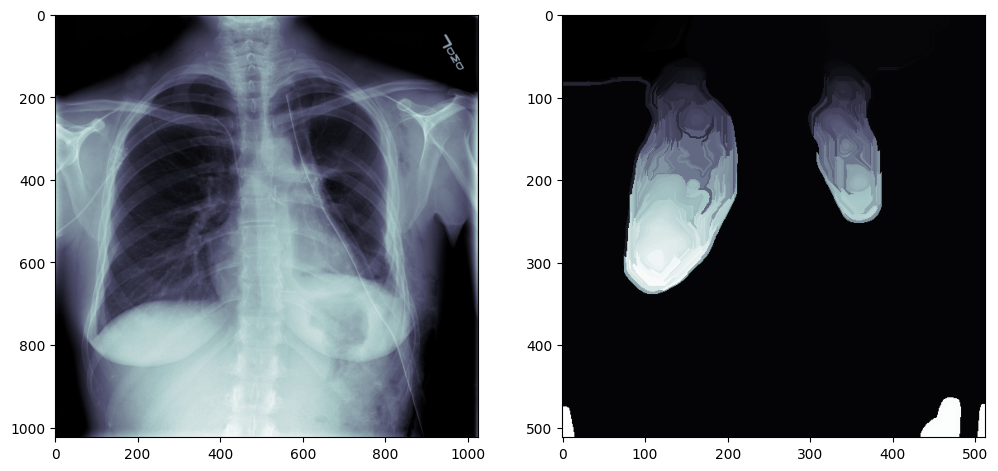

In [11]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments, cmap=plt.cm.bone)


It was possible to segment the lungs quite roughly. To make it work better, you need to select the parameters.

**Tasks** select parameters for better lung segmentation.

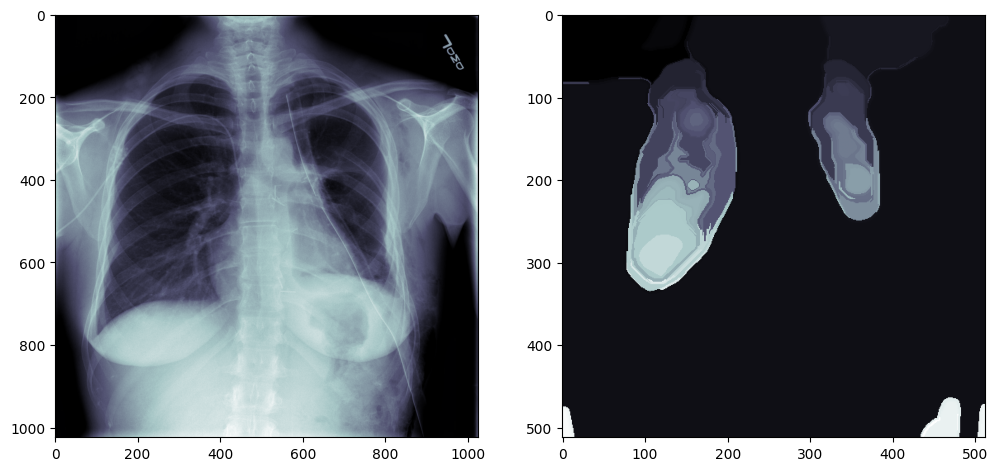

In [12]:
# Adjust the scale parameter
segments_tuned = felzenszwalb(im_small_filt, scale=10) # Try different scale values

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments_tuned, cmap=plt.cm.bone)

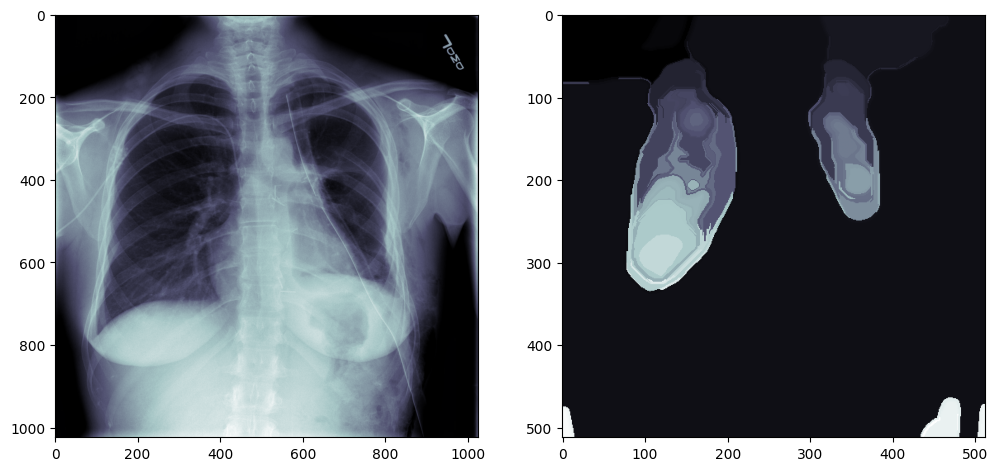

In [14]:
# Adjust the scale parameter
segments_tuned1 = felzenszwalb(im_small_filt, scale=20) # Try different scale values

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments_tuned, cmap=plt.cm.bone)

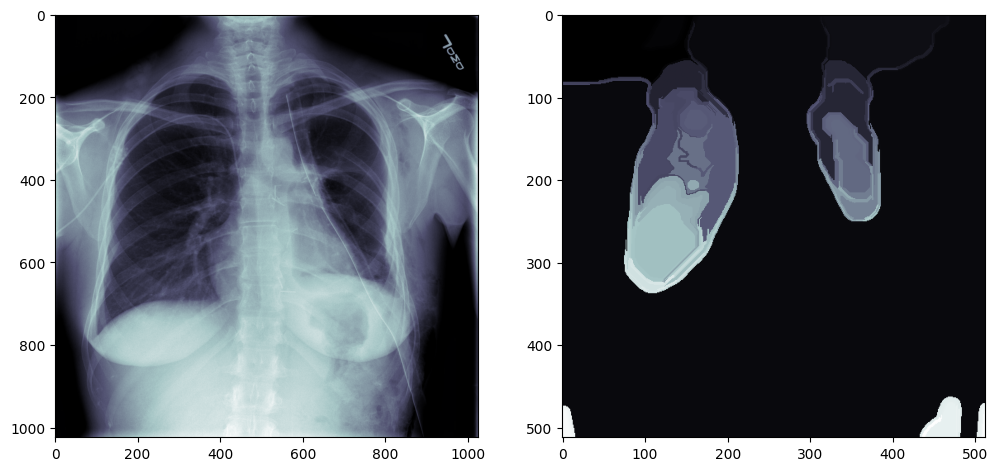

In [15]:
# Adjust the scale and sigma parameters
segments_tuned_sigma = felzenszwalb(im_small_filt, scale=10, sigma=1.0) # Try different sigma values

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments_tuned_sigma, cmap=plt.cm.bone)

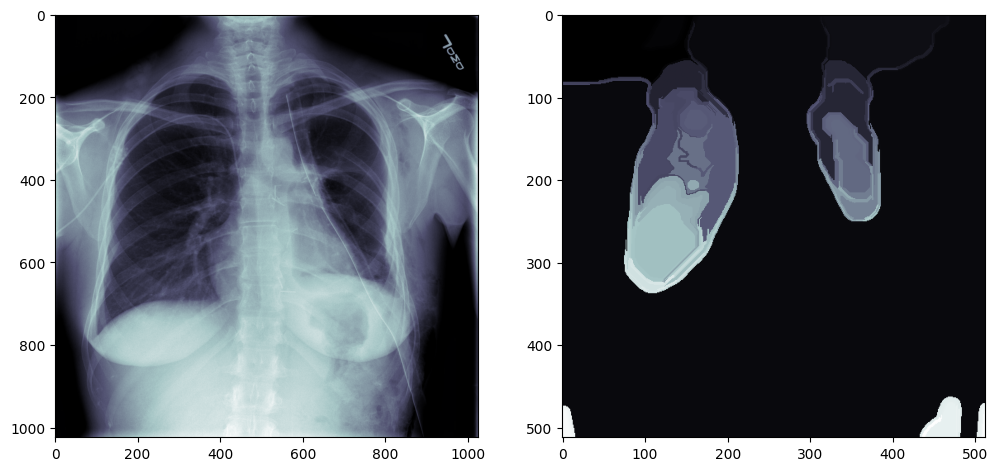

In [16]:
# Adjust the scale and sigma parameters
segments_tuned_sigma1 = felzenszwalb(im_small_filt, scale=10, sigma=5.0) # Try different sigma values

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments_tuned_sigma, cmap=plt.cm.bone)

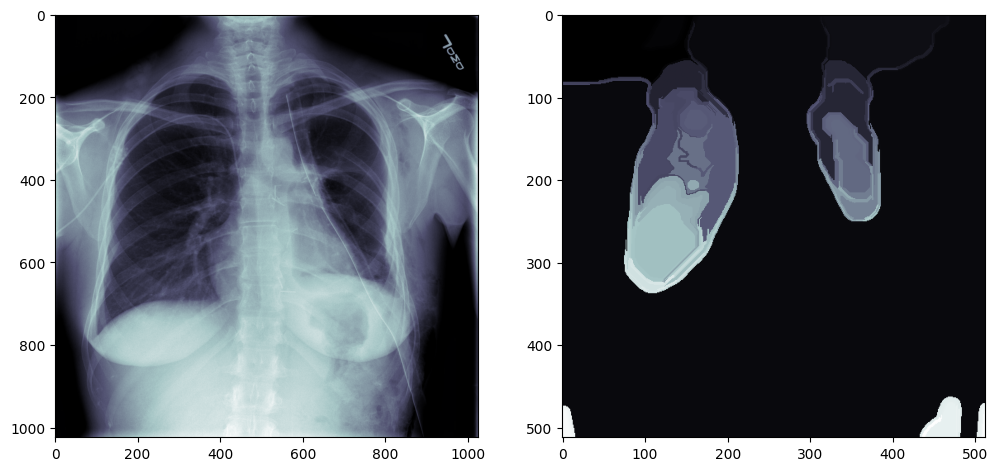

In [17]:
# Adjust the scale and sigma parameters
segments_tuned_sigma2 = felzenszwalb(im_small_filt, scale=10, sigma=0.5) # Try different sigma values

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
ax2.imshow(segments_tuned_sigma, cmap=plt.cm.bone)

# **NN**
Neural networks cope much better with the task of image segmentation. Let's consider several ready-made libraries, which are based on already trained models and solve the problem of medical image segmentation.

Automatic lung segmentation on X-ray images

First, let's look at the fast.ai or Monai library and frameworks

In [18]:
!pip install fastai
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/21.1 MB 50.5 MB/s eta 0:00:01
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may

In [19]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *
from fastai.medical.imaging import *
import pydicom,kornia,skimage

In [20]:
dimg = pydicom.dcmread('stage_2_images/ID_01fe90211.dcm')

The first cool feature is to transform pixel_array into TensorImage like `torch.uint8`. And you can visualize it using the method `.show()`

TensorDicom([[ 74,  64,  54,  ..., 213, 238, 146],
             [ 59,  49,  41,  ..., 200, 227, 140],
             [ 44,  36,  29,  ..., 184, 213, 133],
             ...,
             [  5,   4,   4,  ...,  79,  97,  63],
             [  5,   4,   4,  ...,  80,  97,  64],
             [  5,   5,   4,  ...,  81,  99,  66]], dtype=torch.uint8)


<Axes: >

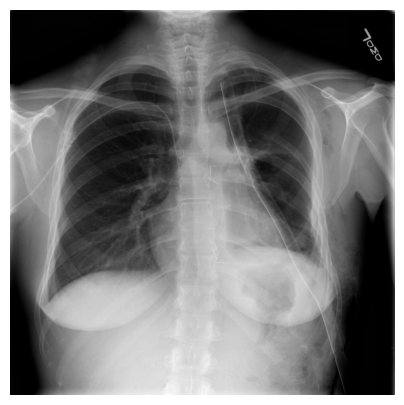

In [21]:
ten_img = TensorDicom(dimg.pixel_array)
print(ten_img)
ten_img.show()

You can also change cmap to bone, which better recognizes different areas of the image.

<Axes: >

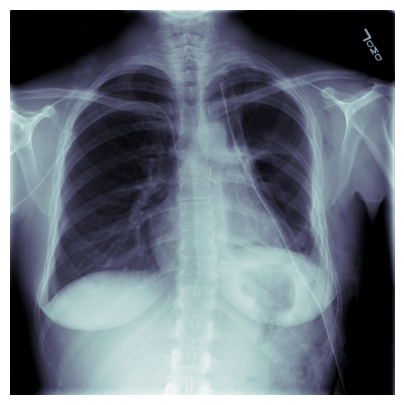

In [22]:
class TensorDicom(TensorImage): _show_args = {'cmap':'bone'}
ten_img2 = TensorDicom(dimg.pixel_array)
ten_img2.show()

You can apply windowing in two ways: by specifying W and L values ​​or by using ready-made windows, for example `dicom_windows.lungs` . The result will be the same.

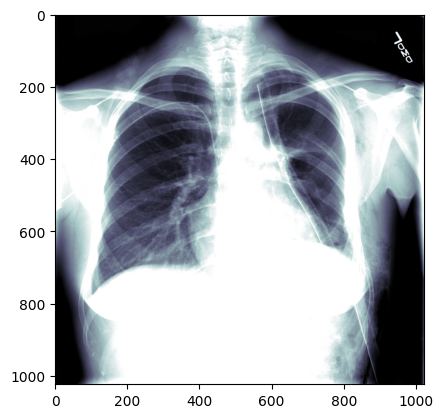

In [24]:
plt.imshow(dimg.windowed(w=1500, l=-600), cmap=plt.cm.bone)
plt.imshow(dimg.windowed(*dicom_windows.lungs), cmap=plt.cm.bone)

You can also customize the display of DICOM images using `show`.

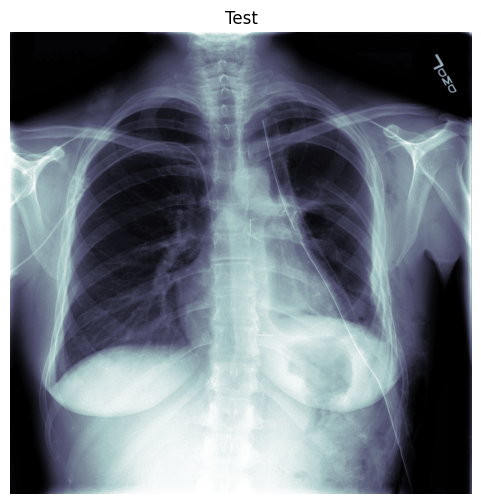

In [25]:
dimg.show(scale=True, cmap=plt.cm.bone, min_px=-1100, max_px=None, ax=None, figsize=(6,6), title='Test', ctx=None)

We can view the pixel distribution of the DICOM image. The histogram below displays the current pixel distribution, which shows the pixel range from 0 to 250.

(array([198404., 101269., 109319.,  87923.,  97903., 115496., 122989.,
        123424.,  84783.,   7066.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

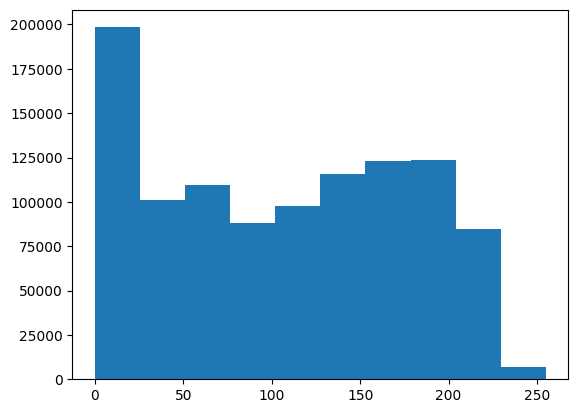

In [26]:
plt.hist(dimg.pixels.flatten().numpy())

Another cool feature is pixel scaling. You can scale by min_px and max_px values ​​for DICOM image pixels or specify them manually.

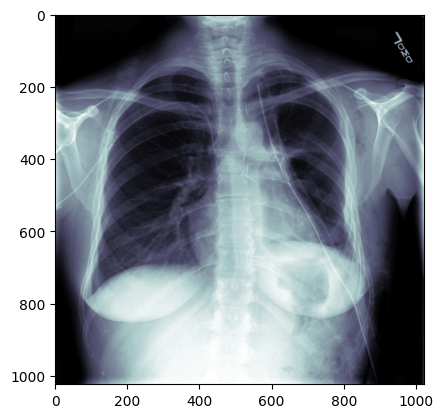

In [27]:
data_scaled = dimg.hist_scaled()
plt.imshow(data_scaled, cmap=plt.cm.bone)

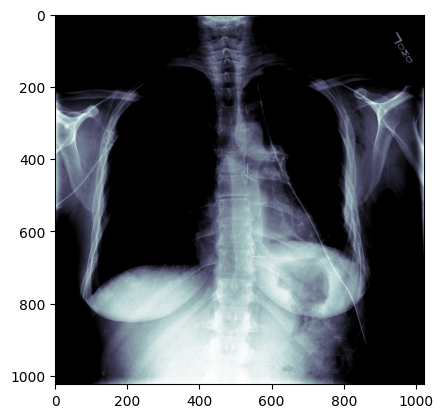

In [28]:
data_scaled = dimg.hist_scaled(min_px=100, max_px=1000)
plt.imshow(data_scaled, cmap=plt.cm.bone);

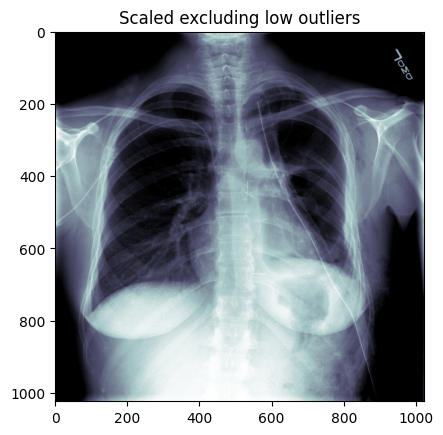

In [30]:
data_scaled_no_outliers = dimg.hist_scaled(min_px=20, max_px=130000)
plt.imshow(data_scaled_no_outliers, cmap=plt.cm.bone)
plt.title('Scaled excluding low outliers')
plt.show()

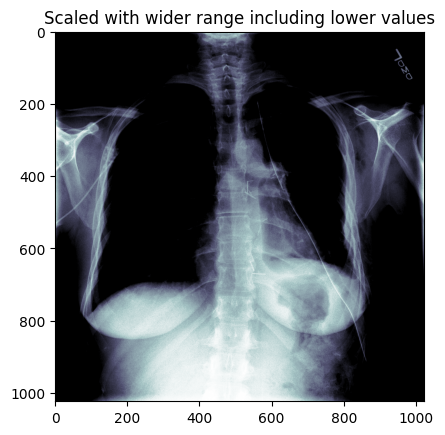

In [33]:
# Example: Starting from a lower min_px value
data_scaled_wider_low = dimg.hist_scaled(min_px=100, max_px=130000)
plt.imshow(data_scaled_wider_low, cmap=plt.cm.bone)
plt.title('Scaled with wider range including lower values')
plt.show()